## Medical Insurance Cost Prediction using TPOT

In [0]:
#import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path='/content/drive/My Drive/Auto ML datasets/insurance.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


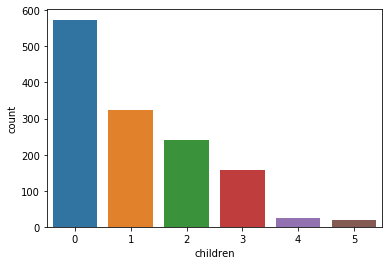

In [7]:
sns.countplot('children', data=df)

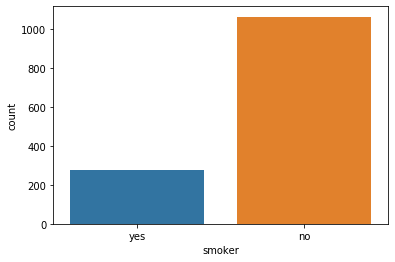

In [8]:
sns.countplot('smoker', data=df)

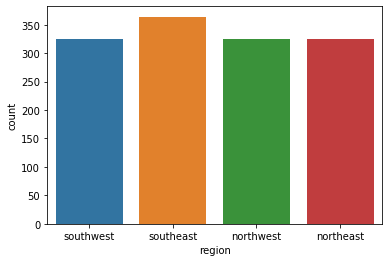

In [9]:
sns.countplot('region', data=df)

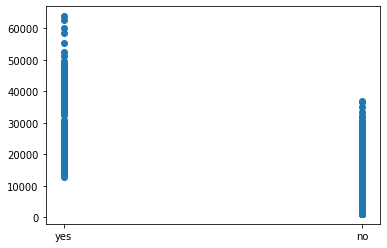

In [10]:
plt.scatter('smoker','charges', data=df)

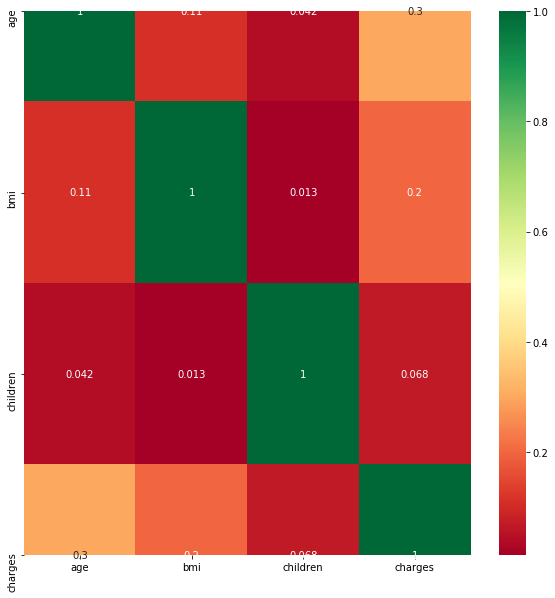

In [11]:
#correlation heatmap
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g= sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [0]:
#categorical variable to numbers

def smoker(yes):
  if yes =='yes':
    return 1
  else:
    return 0

df['smoker']=df['smoker'].apply(smoker)

def sex(s):
  if s=='male':
    return 1
  else:
    return 0
df['sex']=df['sex'].apply(sex)

In [22]:
#seperating the X and Y from the dataset
X=df.drop(['charges'],axis=1)
Y= df['charges']
print(X.shape)
print(Y.shape)

(1338, 6)
(1338,)


In [0]:
#using sklearn to split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

### Lets build TPOT model

In [16]:
#install TPOT
pip install tpot

     |████████████████████████████████| 901kB 8.9MB/s 
     |████████████████████████████████| 153kB 58.2MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
  Created wheel for tpot: filename=TPOT-0.11.0-cp36-none-any.whl size=75684 sha256=41b6473b93a2cbddda50a4657e3b3190f74de9d59ba07bd93a570b24131742fe
  Stored in directory: /root/.cache/pip/wheels/5e/79/3b/49ccea9a29f28d0cdecbca22d71515c23bf45e1e65bc925cb8
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11955 sha256=e170d4c5243f6e5c4f2bca5edee385a5da23cbd6672a1fab8a5834ff54335b45
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built tpot stopit
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


In [0]:
from tpot import TPOTRegressor
from sklearn import metrics

In [23]:
tpot = TPOTRegressor(
    generations=5,
    population_size= 50,
    verbosity =2,
    random_state=42,
    max_time_mins=5,
    max_eval_time_mins=2
)
tpot.fit(X_train, Y_train)

Generation 1 - Current best internal CV score: -22180329.300958972
Generation 2 - Current best internal CV score: -22136899.93078467
Generation 3 - Current best internal CV score: -22136899.93078467
Generation 4 - Current best internal CV score: -21528750.57690247
Generation 5 - Current best internal CV score: -21528750.57690247

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=12, min_samples_split=11, n_estimators=100)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=5,
              max_eval_time_mins=2, max_time_mins=5, memory=None,
              mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=50,
              random_state=42, scoring=None, subsample=1.0, template=None,
              use_dask=False, verbosity=2, warm_start=False)

In [0]:
y_pred= tpot.predict(X_test)

In [19]:
print(metrics.mean_squared_error(Y_test, y_pred))

19051984.156981748


In [20]:
print(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

4364.857862173951
